Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


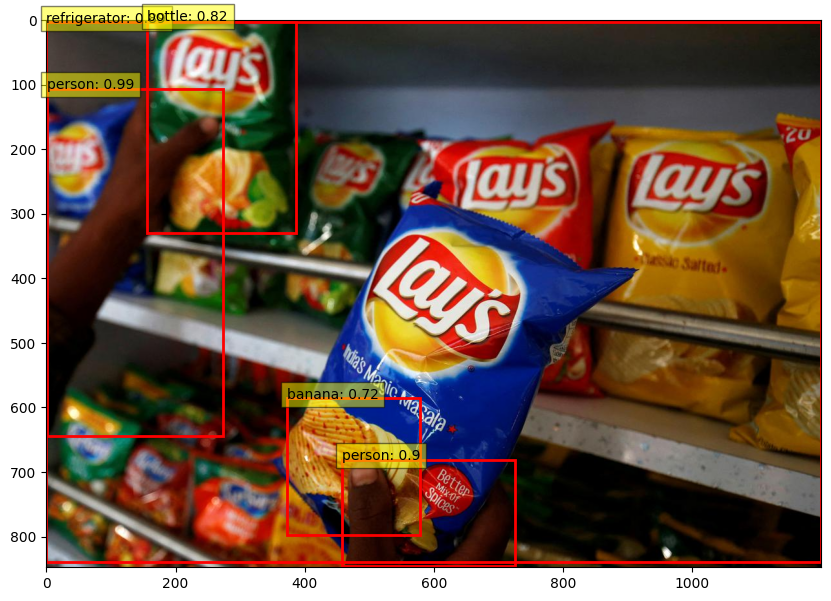

In [15]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load pretrained DETR model
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

# Load your image
image_path = "chipss.jpeg"  # Change this to your image file
image = Image.open(image_path)

# Preprocess the image
inputs = processor(images=image, return_tensors="pt")

# Perform object detection
with torch.no_grad():
    outputs = model(**inputs)

# Post-process the results
target_sizes = torch.tensor([image.size[::-1]])  # Convert image size
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.5)[0]

# Draw bounding boxes and labels
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    x, y, w, h = box
    rect = patches.Rectangle((x, y), w - x, h - y, linewidth=2, edgecolor="red", facecolor="none")
    ax.add_patch(rect)
    ax.text(x, y, f"{model.config.id2label[label.item()]}: {round(score.item(), 2)}", 
            bbox=dict(facecolor="yellow", alpha=0.5))

plt.show()



image 1/1 c:\Users\sanke\OneDrive\Desktop\Models\grains.jpg: 448x640 (no detections), 16.2ms
Speed: 15.9ms preprocess, 16.2ms inference, 16.5ms postprocess per image at shape (1, 3, 448, 640)


In [ ]:
from transformers import AutoImageProcessor, AutoModelForImageClassification
from PIL import Image
import torch

# Load the model from Hugging Face
model_name = "nateraw/food"  # Change to a better-suited model
processor = AutoImageProcessor.from_pretrained(model_name)
model = AutoModelForImageClassification.from_pretrained(model_name)

# Load your image
image = Image.open("packagedrice.jpg")  # Change to your image path
inputs = processor(images=image, return_tensors="pt")

# Perform classification
outputs = model(**inputs)
predicted_class = outputs.logits.argmax(-1).item()

# Print result
print(f"Detected: {model.config.id2label[predicted_class]}")

# Draw bounding boxes and labels
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image)


Detected: fried_rice


NameError: name 'plt' is not defined

In [16]:
#food model


In [1]:
from transformers import AutoImageProcessor, AutoModelForImageClassification
from PIL import Image
import torch

# Load model and processor
model_name = "Kaludi/food-category-classification-v2.0"
processor = AutoImageProcessor.from_pretrained(model_name)
model = AutoModelForImageClassification.from_pretrained(model_name)



In [2]:

# Load your image
image_path = "chipss.jpeg"  # Replace with your image path
image = Image.open(image_path).convert("RGB")  # Ensure correct format

# Process the image
inputs = processor(images=image, return_tensors="pt")


In [3]:

# Get predictions
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = logits.argmax(-1).item()

# Get class label from model config
label = model.config.id2label[predicted_class]

# Print result
print(f"Predicted Food Category: {label}")

Predicted Food Category: Dairy


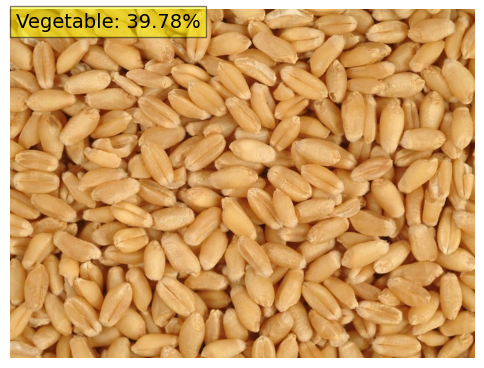

In [5]:
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from transformers import AutoImageProcessor, AutoModelForImageClassification
from PIL import Image
import requests

# Load model and processor
model_name = "Kaludi/food-category-classification-v2.0"
processor = AutoImageProcessor.from_pretrained(model_name)
model = AutoModelForImageClassification.from_pretrained(model_name)
model.eval()

# Load image
image_path = "wheat.jpg"  # Change this to your image file path
image = Image.open(image_path).convert("RGB")

# Preprocess image
inputs = processor(images=image, return_tensors="pt")

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)
    scores = torch.nn.functional.softmax(outputs.logits, dim=-1)  # Convert logits to probabilities
    predicted_class_idx = scores.argmax().item()  # Get index of the highest probability
    predicted_label = model.config.id2label[predicted_class_idx]  # Get class label
    predicted_score = scores[0, predicted_class_idx].item()  # Get probability score

# Display image with classification result
fig, ax = plt.subplots(1, figsize=(6, 6))
ax.imshow(image)
ax.axis("off")

# Overlay classification label
text = f"{predicted_label}: {round(predicted_score * 100, 2)}%"
ax.text(10, 30, text, fontsize=14, bbox=dict(facecolor="yellow", alpha=0.5))

plt.show()


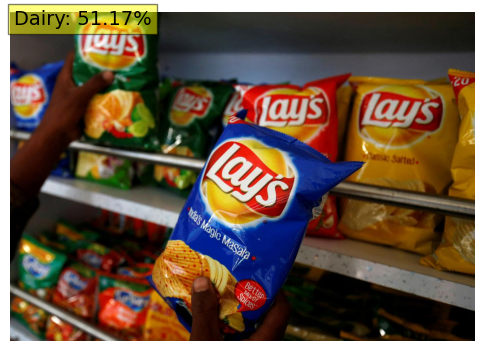

In [6]:
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from transformers import AutoImageProcessor, AutoModelForImageClassification
from PIL import Image

# Load model and processor
model_name = "Kaludi/food-category-classification-v2.0"
processor = AutoImageProcessor.from_pretrained(model_name)
model = AutoModelForImageClassification.from_pretrained(model_name)
model.eval()

def classify_and_display(image_path):
    """
    Classifies an image using the food-category-classification model and displays it with the predicted label.

    Args:
        image_path (str): Path to the input image.
    """
    # Load image
    image = Image.open(image_path).convert("RGB")

    # Preprocess image
    inputs = processor(images=image, return_tensors="pt")

    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)
        scores = torch.nn.functional.softmax(outputs.logits, dim=-1)  # Convert logits to probabilities
        predicted_class_idx = scores.argmax().item()  # Get index of the highest probability
        predicted_label = model.config.id2label[predicted_class_idx]  # Get class label
        predicted_score = scores[0, predicted_class_idx].item()  # Get probability score

    # Display image with classification result
    fig, ax = plt.subplots(1, figsize=(6, 6))
    ax.imshow(image)
    ax.axis("off")

    # Overlay classification label
    text = f"{predicted_label}: {round(predicted_score * 100, 2)}%"
    ax.text(10, 30, text, fontsize=14, bbox=dict(facecolor="yellow", alpha=0.5))

    plt.show()

# Example usage
classify_and_display("chipss.jpeg")  # Replace with your image path


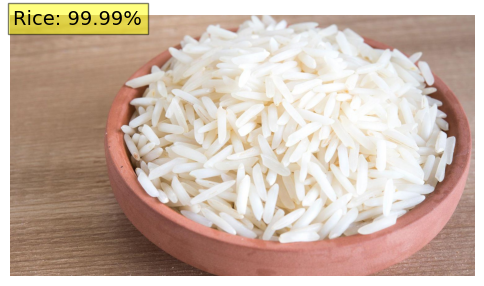

In [8]:
classify_and_display("rice.jpg")

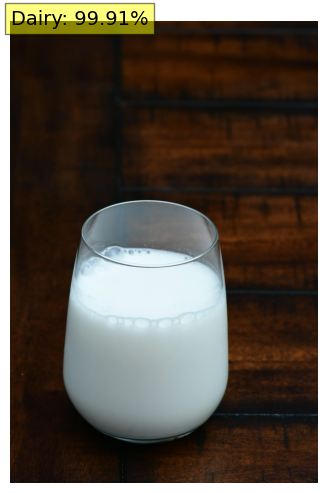

In [9]:
classify_and_display("milk.jpeg")

In [ ]:
import io
import torch
import nest_asyncio
import uvicorn
from fastapi import FastAPI, File, UploadFile
from fastapi.middleware.cors import CORSMiddleware
from transformers import AutoImageProcessor, AutoModelForImageClassification
from PIL import Image
from threading import Thread

# Apply nest_asyncio to run FastAPI inside Jupyter
nest_asyncio.apply()

app = FastAPI()

# Enable CORS (if needed)
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

# Load model and processor
model_name = "Kaludi/food-category-classification-v2.0"
processor = AutoImageProcessor.from_pretrained(model_name)
model = AutoModelForImageClassification.from_pretrained(model_name)
model.eval()

@app.post("/classify")
async def classify_image(file: UploadFile = File(...)):
    # Read and process image
    image = Image.open(io.BytesIO(await file.read())).convert("RGB")
    inputs = processor(images=image, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**inputs)
        scores = torch.nn.functional.softmax(outputs.logits, dim=-1)  # Convert logits to probabilities
        predicted_class_idx = scores.argmax().item()
        predicted_label = model.config.id2label[predicted_class_idx]
        confidence = scores[0, predicted_class_idx].item()

    return {
        "prediction": predicted_label,
        "confidence": round(confidence * 100, 2)  # Convert to percentage
    }

# Function to run FastAPI in background
def run_api():
    uvicorn.run(app, host="0.0.0.0", port=8001)

# Run FastAPI in a separate thread to keep Jupyter responsive
api_thread = Thread(target=run_api, daemon=True)
api_thread.start()


INFO:     Started server process [3244]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8001 (Press CTRL+C to quit)


In [2]:
import requests

url = "http://localhost:8001/classify"
files = {"file": open("rice.jpg", "rb")}  # Change to your image path
response = requests.post(url, files=files)

print(response.json())  # Should return prediction + confidence


INFO:     127.0.0.1:11330 - "POST /classify HTTP/1.1" 200 OK
INFO:     127.0.0.1:11343 - "POST /classify HTTP/1.1" 200 OK
INFO:     127.0.0.1:8335 - "GET /classify HTTP/1.1" 405 Method Not Allowed
INFO:     127.0.0.1:10098 - "POST /classify HTTP/1.1" 200 OK
INFO:     127.0.0.1:10102 - "POST /classify HTTP/1.1" 200 OK


{'prediction': 'Rice', 'confidence': 99.99}
